In [ ]:
import tensorflow as tf
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm  
import keras
import math
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import merge, Input, concatenate
from keras.models import Model
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import MaxPooling2D, Convolution2D
from keras import optimizers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir = "/content/drive/MyDrive/training_images"

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
    
    data_format='channels_first',
    validation_split=0.2) 

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(28, 28),
    color_mode = "grayscale",
    batch_size=20,
    shuffle = True,
    classes = ['0','1','2','3','4','5','6','7','8','9','+','-','times','(',')'],
    class_mode="sparse",
    subset='training') 

validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(28, 28),
    color_mode = "grayscale",
    batch_size=20,
    shuffle = True,
    classes = ['0','1','2','3','4','5','6','7','8','9','+','-','times','(',')'],
    class_mode="sparse",
    subset='validation') 

Found 52205 images belonging to 15 classes.
Found 13046 images belonging to 15 classes.


In [ ]:
import keras
keras.backend.set_image_data_format('channels_first')

In [ ]:
from keras.layers import merge, Input, concatenate
from keras.models import Model
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import MaxPooling2D, Convolution2D

init = Input(shape=(1, 28, 28),)

fork11 = Convolution2D(64, 5, 5,  activation="relu", border_mode='same')(init)
fork12 = Convolution2D(64, 5, 5, activation="relu", border_mode='same')(init)
merge1 = concatenate([fork11, fork12], axis=1, name='merge1')
maxpool1 = MaxPooling2D(strides=(2,2), border_mode='same')(merge1)

fork21 = Convolution2D(128, 4, 4, activation="relu", border_mode='same')(maxpool1)
fork22 = Convolution2D(128, 4, 4, activation="relu", border_mode='same')(maxpool1)
merge2 = concatenate([fork21, fork22, ], axis=1, name='merge2')
maxpool2 = MaxPooling2D(strides=(2,2), border_mode='same')(merge2)

fork31 = Convolution2D(256, 3, 3, activation="relu", border_mode='same')(maxpool2)
fork32 = Convolution2D(256, 3, 3, activation="relu", border_mode='same')(maxpool2)
fork33 = Convolution2D(256, 3, 3, activation="relu", border_mode='same')(maxpool2)
fork34 = Convolution2D(256, 3, 3, activation="relu", border_mode='same')(maxpool2)
fork35 = Convolution2D(256, 3, 3, activation="relu", border_mode='same')(maxpool2)
fork36 = Convolution2D(256, 3, 3, activation="relu", border_mode='same')(maxpool2)
merge3 = concatenate([fork31, fork32, fork33, fork34, fork35, fork36, ], axis=1, name='merge3')
maxpool3 = MaxPooling2D(strides=(2,2), border_mode='same')(merge3)

dropout = Dropout(0.2)(maxpool3)

flatten = Flatten()(dropout)
output = Dense(15, activation="softmax")(flatten)

model = Model(input=init, output=output)

model.summary()


Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 1, 28, 28)    0                                            
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 64, 28, 28)   1664        input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_22 (Conv2D)              (None, 64, 28, 28)   1664        input_3[0][0]                    
__________________________________________________________________________________________________
merge1 (Concatenate)            (None, 128, 28, 28)  0           conv2d_21[0][0]                  
                                                                 conv2d_22[0][0]           

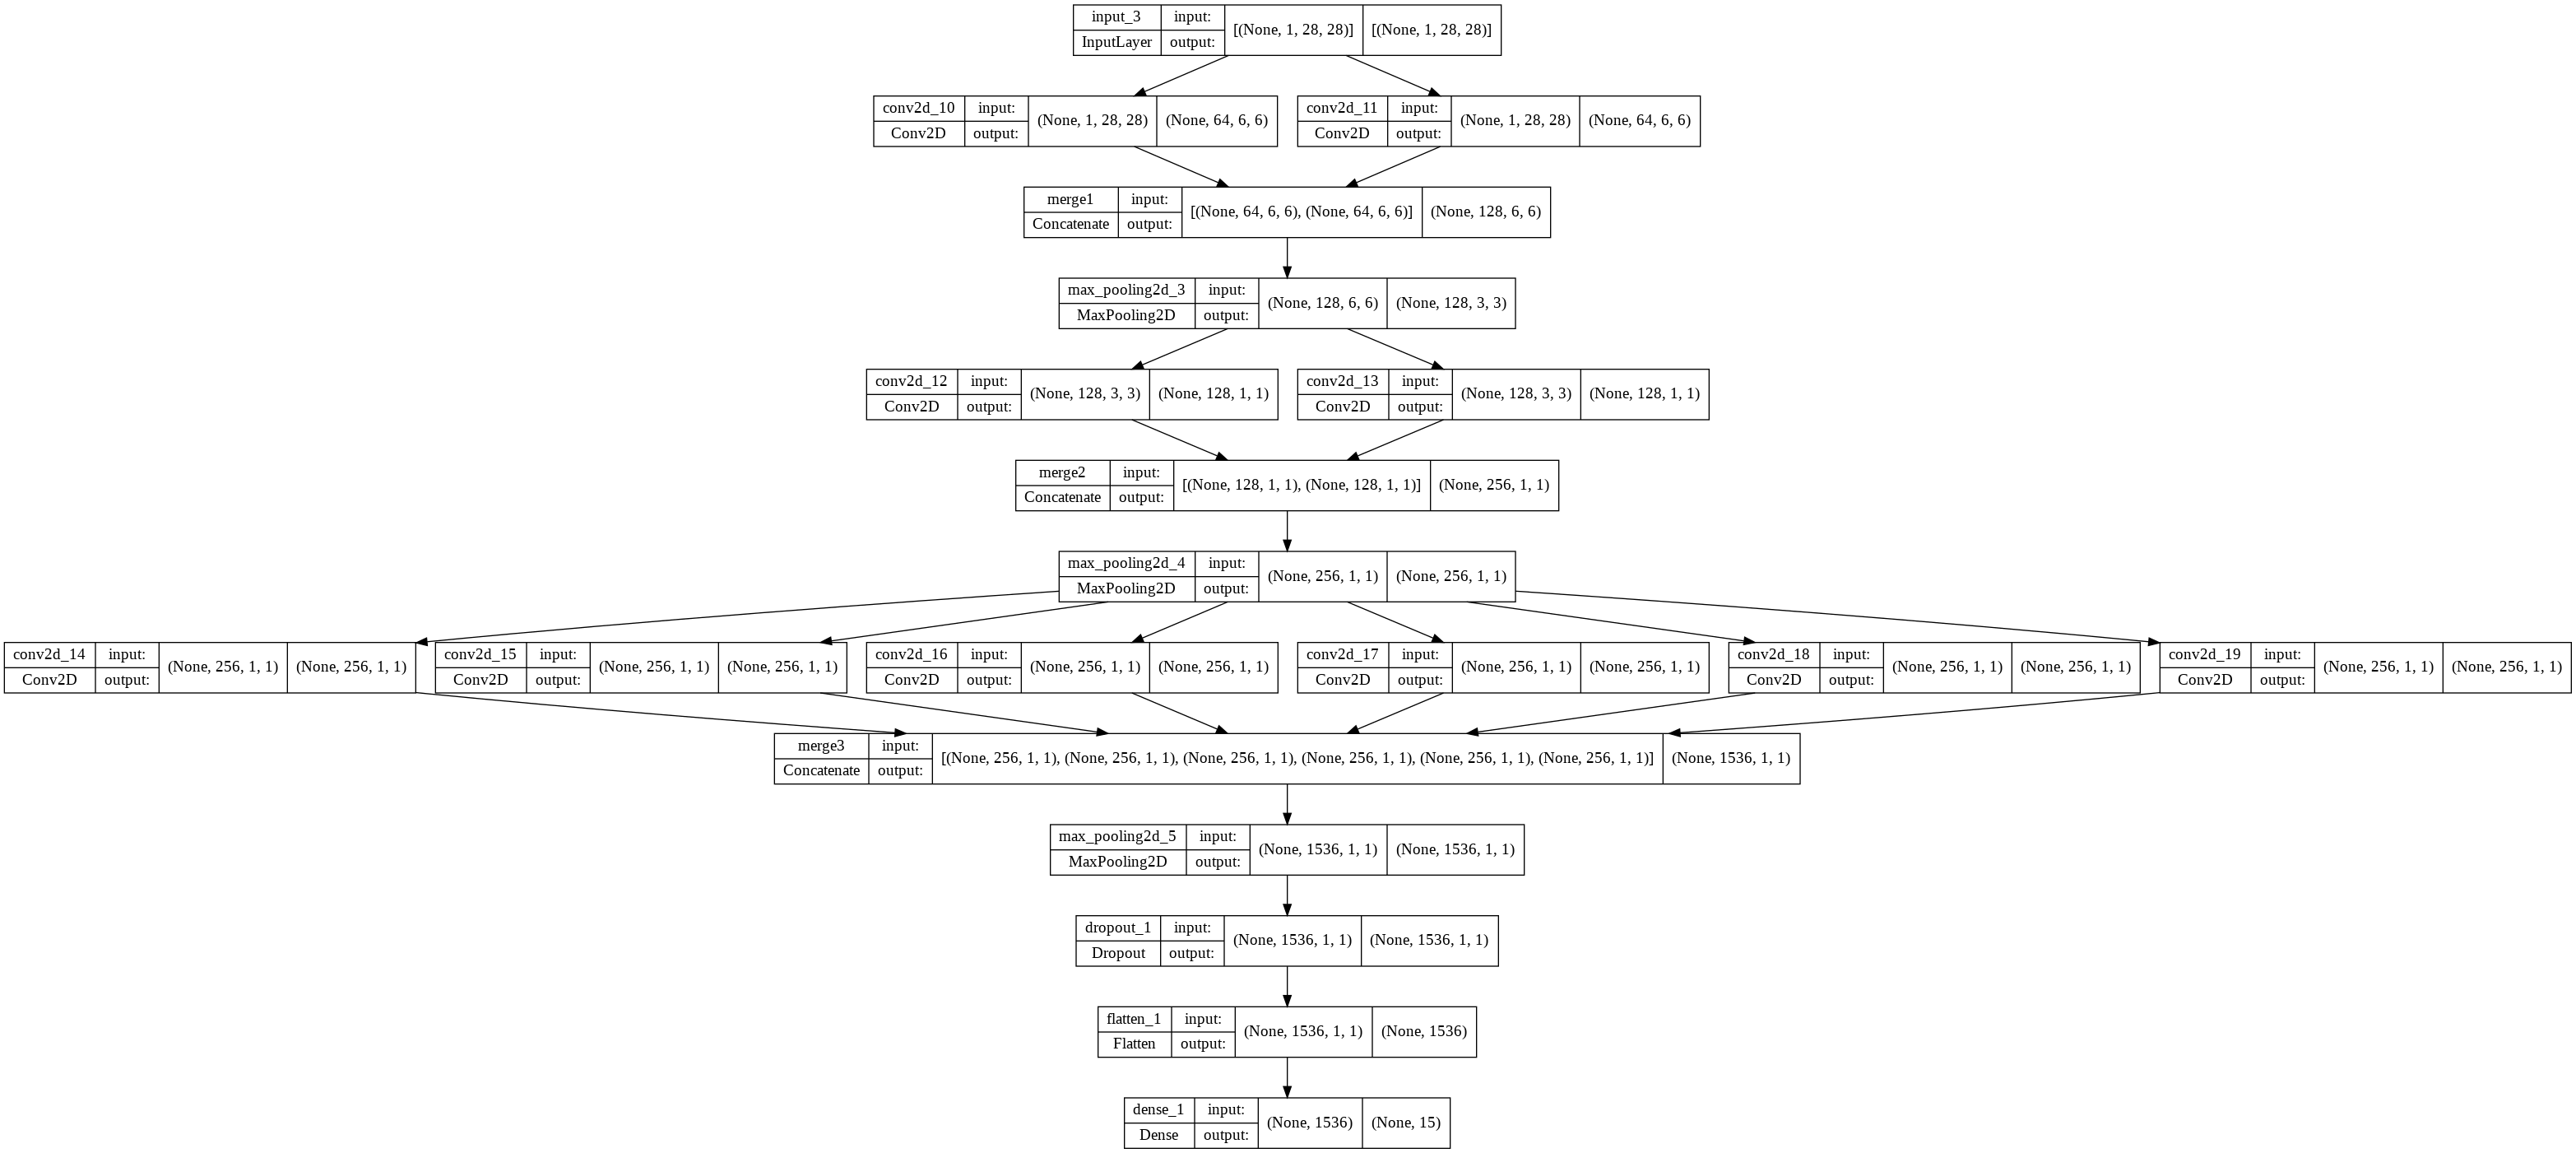

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
ada = tf.keras.optimizers.Adadelta(learning_rate=1.0, rho=0.95)
model.compile(optimizer=ada,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit_generator(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              validation_steps=100,
                              epochs=10)


Epoch 1/10
100/100 [==============================] - 109s - loss: 0.6996 - accuracy: 0.8945 - val_loss: 0.2604 - val_accuracy: 0.9485
Epoch 2/10
100/100 [==============================] - 92s - loss: 0.2099 - accuracy: 0.9265 - val_loss: 0.1137 - val_accuracy: 0.9305
Epoch 3/10
100/100 [==============================] - 91s - loss: 0.2099 - accuracy: 0.9305 - val_loss: 0.0928 - val_accuracy: 0.9560
Epoch 4/10
100/100 [==============================] - 92s - loss: 0.1627 - accuracy: 0.9435 - val_loss: 0.0488 - val_accuracy: 0.9495
Epoch 5/10
100/100 [==============================] - 111s - loss: 0.1631 - accuracy: 0.9520 - val_loss: 0.1016 - val_accuracy: 0.9615
Epoch 6/10
100/100 [==============================] - 92s - loss: 0.1216 - accuracy: 0.9630 - val_loss: 0.0193 - val_accuracy: 0.9750
Epoch 7/10
100/100 [==============================] - 93s - loss: 0.1241 - accuracy: 0.9665 - val_loss: 0.0561 - val_accuracy: 0.9773
Epoch 8/10
100/100 [==============================] - 102s 

### As seen from the results above, the model has given **97.10%** accuracy in the last epoch. Hence, the performance of this model is much better than the other models.

### **Performance of the model and comparative analysis**

In [ ]:
def getGraphs(history):
    xlabel = 'Epoch'
    legends = ['Training', 'Validation']

    ylim_pad = [0.01, 0.1]

    # Accuracy
    y1 = history.history['accuracy']
    y2 = history.history['val_accuracy']

    min_y = min(min(y1), min(y2))-ylim_pad[1]
    max_y = max(max(y1), max(y2))+ylim_pad[1]

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Accuracy', fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()
                            
    plt.show()
  
    # Loss
    y1 = history.history['loss']
    y2 = history.history['val_loss']

    min_y = min(min(y1), min(y2))-ylim_pad[1]
    max_y = max(max(y1), max(y2))+ylim_pad[1]

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Loss', fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()
                            
    plt.show()

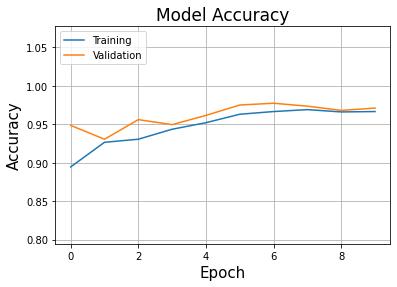

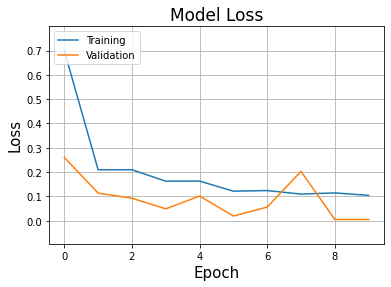

In [ ]:
getGraphs(history)

In [ ]:
model.save('ImageProcModel.h5')

### **Comparative analysis from other models identified in the literature survey**

In [ ]:
LeNet_1 = 73.78
LeNet_ECOC_1 = 67.43
LeNet_2 = 85.86
LeNet_ECOC_2 = 85.88
AlexNet = 97.06
ResNet = 94.00
DenseNet_121 = 96.30
DCCNN_Model = 97.10

import plotly.graph_objects as go
colors = ['rgb(166,216,84)',] * 8
colors[7] = 'green'
x = ['LeNet-1', 'LeNet ECOC-1', 'LeNet-2', 'LeNet-ECOC-2', 'AlexNet', 'ResNet', 'DenseNet-121', 'DCCNN-Model']
y = [LeNet_1, LeNet_ECOC_1, LeNet_2, LeNet_ECOC_2, AlexNet, ResNet, DenseNet_121, DCCNN_Model]

fig = go.Figure(data=[go.Bar(
            x=x, y=y,
            text=y,
            textposition='auto',
            marker_color = colors
        )])
fig.update_layout(title_text='Comparative Analysis of Models')
fig.update_yaxes(title="Accuracy")
fig.update_xaxes(title="Models")
fig.show()